# Random Assignment Algorithm

This project implements the Metropolis-Hastings algorithm to solve a random assignment problem, where `n` jobs are assigned to `n` machines in order to minimize the total cost. The algorithm aims to estimate the expected cost value associated with the optimal solution.

## Key Features:

### - Proposal Mechanism
The algorithm employs a proposal mechanism where two elements of the current permutation are swapped to generate a new proposed permutation. This approach ensures more efficient exploration of the state space compared to generating completely new random permutations at each step.

```python
def metropolis_hastings(C, beta, steps, burn_in):
    n = len(C)
    sigma = random_permutation(n)                                              
    
    for _ in range(steps + burn_in):
        # This creates a copy of the current permutation sigma
        proposed_sigma = sigma[:]
        # This randomly selects two different indices i and j from the range 0 to n-1.           
        i, j = random.sample(range(n), 2)
        # This swaps the elements at indices i and j in the proposed permutation, 
        # in order to generate a new permutation (SMALL CHANGE).
        proposed_sigma[i], proposed_sigma[j] = proposed_sigma[j], proposed_sigma[i]
```
### - Burn-in Period
A burn-in period is introduced to allow the Markov chain to stabilize before collecting samples. The initial steps (burn-in period) are discarded to ensure the samples are representative of the stationary distribution. In this implementation, the burn-in period is set to 10% of the total number of steps.

### - Independent Cost Matrices
Each realization of the Metropolis-Hastings algorithm uses an independent cost matrix generated with random values uniformly distributed between 0 and 1. This approach avoids bias and provides a more accurate representation of the expected cost.
```python
# SIMULATIONS

for n in dimensions:
    print(f"Processing dimension: {n}")
    costs_list = []
    for _ in range(M):
        C = cost_matrix_generator(n) # Generation of a new cost matrix each time
        sigma = metropolis_hastings(C, beta, steps, burn_in)
        cost = calculate_total_cost(C, sigma)
        costs_list.append(cost)
    E_An = sum(costs_list) / M
    expected_values_list.append(E_An)

print(expected_values_list)
```
### - Increased Beta for Faster Convergence
The parameter `beta` controls the acceptance probability of new states. Increasing `beta` makes the algorithm more strict in accepting new states, leading to faster convergence towards the optimal solution. However, care is taken to ensure that the acceptance rate does not drop too low, which would hinder the exploration of the state space.

## Algorithm Parameters

- **Beta (`β`)**: Controls the acceptance probability of new states. Set to 50 in this implementation to balance convergence speed and exploration.
- **Steps (`N`)**: Total number of steps in the Markov chain. Set to 10% of the total amount of steps.
- **Burn-in**: Number of initial steps discarded to allow the Markov chain to stabilize. Set to 50,000 steps (10% of total steps).
- **Dimensions**: The range of dimensions `n` to explore. Set to values from 5 to 10.
- **Simulations (`M`)**: Number of independent realizations for each dimension. Set to 1,000 simulations.

## Usage

The algorithm is executed with the following steps:

1. Generate a random cost matrix `C` of size `n x n`.
2. Initialize a random permutation `sigma`.
3. For each step in the Markov chain, propose a new permutation by swapping two elements of the current permutation.
4. Calculate the total cost of the current and proposed permutations.
5. Accept or reject the proposed permutation based on the acceptance probability.
6. Repeat steps 3-5 for the total number of steps, including the burn-in period.
7. After the burn-in period, collect the samples and estimate the expected cost.

### $\beta = 10; N = 1000; M = 1000, n = \{5, 6, 7, 8, 9\}$

Processing dimension: 5
Processing dimension: 6
Processing dimension: 7
Processing dimension: 8
Processing dimension: 9
[1.2111411706537052, 1.3062680528655557, 1.3768586524749433, 1.4526830496187049, 1.5554053420616614]


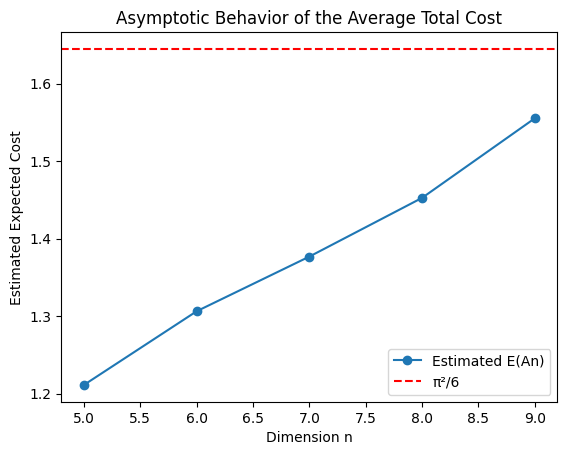

In [2]:
import numpy as np
import random

# Generate a cost matrix of random numbers uniformly distributed between 0 and 1
def cost_matrix_generator(n):
    cost_matrix = np.random.uniform(low=0, high=1, size=(n, n))
    return cost_matrix

def calculate_total_cost(C, sigma):
    # sigma[i] gives the machine (j) assigned to job i.
    total_cost = sum(C[i, sigma[i]] for i in range(len(sigma)))
    return total_cost

def random_permutation(n):
    permutation = list(range(n))
    random.shuffle(permutation)
    return permutation

def metropolis_hastings(C, beta, steps, burn_in):
    n = len(C)
    sigma = random_permutation(n)                                              
    
    for _ in range(steps + burn_in):
        # This creates a copy of the current permutation sigma
        proposed_sigma = sigma[:]
        # This randomly selects two different indices i and j from the range 0 to n-1.           
        i, j = random.sample(range(n), 2)
        # This swaps the elements at indices i and j in the proposed permutation, 
        # in order to generate a new permutation by making a SMALL change (a swap) to the current permutation.
        proposed_sigma[i], proposed_sigma[j] = proposed_sigma[j], proposed_sigma[i]

        reference_cost = calculate_total_cost(C, sigma)
        proposed_cost = calculate_total_cost(C, proposed_sigma)

        # Calculate acceptance probability
        acceptance_prob = min(1, np.exp(-beta * (proposed_cost - reference_cost)))

        # Decide whether to accept the proposed state
        if random.uniform(0, 1) < acceptance_prob:
            sigma = proposed_sigma

    return sigma

# SIMULATIONS

# Parameters for the Metropolis-Hastings algorithm
beta = 10
steps = 1000
burn_in = 10 # Adding a burn-in period to stabilize the Markov chain

# Parameters for the simulation
dimensions = [number for number in range(5, 10)]
M = 1000 # Number of simulations

expected_values_list = []

for n in dimensions:
    print(f"Processing dimension: {n}")
    costs_list = []
    for _ in range(M):
        C = cost_matrix_generator(n)
        sigma = metropolis_hastings(C, beta, steps, burn_in)
        cost = calculate_total_cost(C, sigma)
        costs_list.append(cost)
    E_An = sum(costs_list) / M
    expected_values_list.append(E_An)

print(expected_values_list)

# Plotting the results
import matplotlib.pyplot as plt

plt.plot(dimensions, expected_values_list, marker='o', label='Estimated E(An)')
plt.axhline(y=np.pi**2 / 6, color='r', linestyle='--', label='π²/6')
plt.xlabel('Dimension n')
plt.ylabel('Estimated Expected Cost')
plt.title('Asymptotic Behavior of the Average Total Cost')
plt.legend()
plt.show()

**Parameters used**: $\beta = 10; N = 1000; M = 1000, n = \{5, 6, 7, 8, 9\}$

### $\beta = 10; N = 10000; M = 1000; n = \{5, 6, 7, 8, 9\}$

Processing dimension: 5
Processing dimension: 6
Processing dimension: 7
Processing dimension: 8
Processing dimension: 9
[1.1918234176701925, 1.2846198312924104, 1.396877003590466, 1.4749283962768167, 1.5665011278009624]


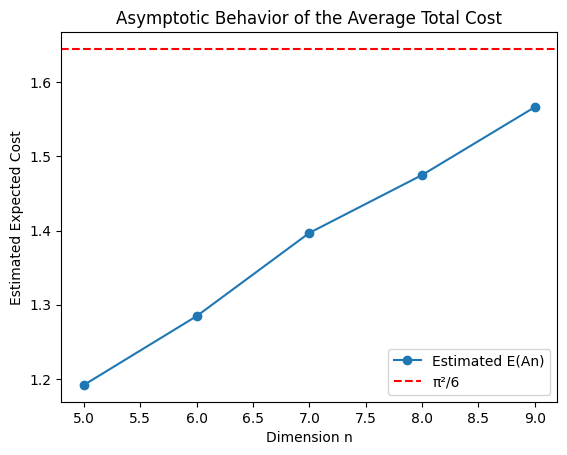

In [3]:
import numpy as np
import random

# Generate a cost matrix of random numbers uniformly distributed between 0 and 1
def cost_matrix_generator(n):
    cost_matrix = np.random.uniform(low=0, high=1, size=(n, n))
    return cost_matrix

def calculate_total_cost(C, sigma):
    total_cost = sum(C[i, sigma[i]] for i in range(len(sigma)))
    return total_cost

def random_permutation(n):
    permutation = list(range(n))
    random.shuffle(permutation)
    return permutation

def metropolis_hastings(C, beta, steps, burn_in=10000):
    n = len(C)
    sigma = random_permutation(n)                                              
    
    for _ in range(steps + burn_in):
        proposed_sigma = sigma[:]
        i, j = random.sample(range(n), 2)
        proposed_sigma[i], proposed_sigma[j] = proposed_sigma[j], proposed_sigma[i]

        reference_cost = calculate_total_cost(C, sigma)
        proposed_cost = calculate_total_cost(C, proposed_sigma)

        # Calculate acceptance probability
        acceptance_prob = min(1, np.exp(-beta * (proposed_cost - reference_cost)))

        # Decide whether to accept the proposed state
        if random.uniform(0, 1) < acceptance_prob:
            sigma = proposed_sigma

    return sigma

# SIMULATIONS

# Parameters for the Metropolis-Hastings algorithm
beta = 10 
steps = 10000 
burn_in = 100 # Adding a burn-in period to stabilize the Markov chain

# Parameters for the simulation
dimensions = [number for number in range(5, 10)]
M = 1000 # Number of simulations

expected_values_list = []

for n in dimensions:
    print(f"Processing dimension: {n}")
    costs_list = []
    for _ in range(M):
        C = cost_matrix_generator(n)
        sigma = metropolis_hastings(C, beta, steps, burn_in)
        cost = calculate_total_cost(C, sigma)
        costs_list.append(cost)
    E_An = sum(costs_list) / M
    expected_values_list.append(E_An)

print(expected_values_list)

# Plotting the results
import matplotlib.pyplot as plt

plt.plot(dimensions, expected_values_list, marker='o', label='Estimated E(An)')
plt.axhline(y=np.pi**2 / 6, color='r', linestyle='--', label='π²/6')
plt.xlabel('Dimension n')
plt.ylabel('Estimated Expected Cost')
plt.title('Asymptotic Behavior of the Average Total Cost')
plt.legend()
plt.show()

**Parameters used**: $\beta = 10; N = 10000; M = 1000, n = \{5, 6, 7, 8, 9\}$

### $\beta = 20; N = 50000; M = 1000, n = \{5, 6, 7, 8, 9\}$

Processing dimension: 5
Processing dimension: 6
Processing dimension: 7
Processing dimension: 8
Processing dimension: 9
[1.1649716250864872, 1.2300508004416537, 1.2730938622936416, 1.348623736371532, 1.3846478462794842]


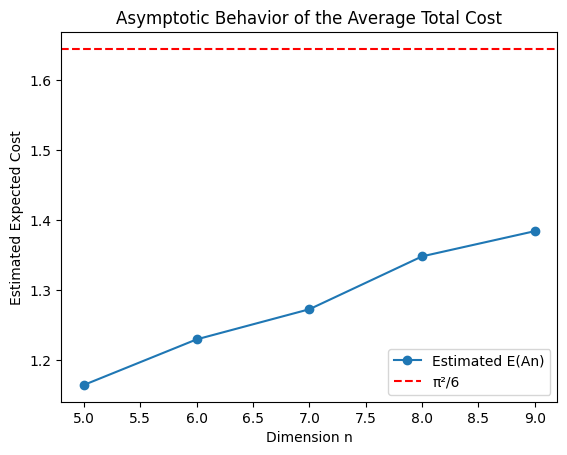

In [4]:
import numpy as np
import random

# Generate a cost matrix of random numbers uniformly distributed between 0 and 1
def cost_matrix_generator(n):
    cost_matrix = np.random.uniform(low=0, high=1, size=(n, n))
    return cost_matrix

def calculate_total_cost(C, sigma):
    total_cost = sum(C[i, sigma[i]] for i in range(len(sigma)))
    return total_cost

def random_permutation(n):
    permutation = list(range(n))
    random.shuffle(permutation)
    return permutation

def metropolis_hastings(C, beta, steps, burn_in=10000):
    n = len(C)
    sigma = random_permutation(n)                                              
    
    for _ in range(steps + burn_in):
        proposed_sigma = sigma[:]
        i, j = random.sample(range(n), 2)
        proposed_sigma[i], proposed_sigma[j] = proposed_sigma[j], proposed_sigma[i]

        reference_cost = calculate_total_cost(C, sigma)
        proposed_cost = calculate_total_cost(C, proposed_sigma)

        # Calculate acceptance probability
        acceptance_prob = min(1, np.exp(-beta * (proposed_cost - reference_cost)))

        # Decide whether to accept the proposed state
        if random.uniform(0, 1) < acceptance_prob:
            sigma = proposed_sigma

    return sigma

# SIMULATIONS

# Parameters for the Metropolis-Hastings algorithm
beta = 20 
steps = 50000 
burn_in = 5000 # Adding a burn-in period to stabilize the Markov chain, equal to 10% of N.

# Parameters for the simulation
dimensions = [number for number in range(5, 10)] 
M = 1000 # Number of simulations

expected_values_list = []

for n in dimensions:
    print(f"Processing dimension: {n}")
    costs_list = []
    for _ in range(M):
        C = cost_matrix_generator(n)
        sigma = metropolis_hastings(C, beta, steps, burn_in)
        cost = calculate_total_cost(C, sigma)
        costs_list.append(cost)
    E_An = sum(costs_list) / M
    expected_values_list.append(E_An)

print(expected_values_list)

# Plotting the results
import matplotlib.pyplot as plt

plt.plot(dimensions, expected_values_list, marker='o', label='Estimated E(An)')
plt.axhline(y=np.pi**2 / 6, color='r', linestyle='--', label='π²/6')
plt.xlabel('Dimension n')
plt.ylabel('Estimated Expected Cost')
plt.title('Asymptotic Behavior of the Average Total Cost')
plt.legend()
plt.show()

**Parameters used**: $\beta = 20; N = 50000; M = 1000, n = \{5, 6, 7, 8, 9\}$

### $\beta = 20; N = 100000; M = 1000; n = \{5, 6, ..., 12\}$

Processing dimension: 5
Processing dimension: 6
Processing dimension: 7
Processing dimension: 8
Processing dimension: 9
Processing dimension: 10
Processing dimension: 11
Processing dimension: 12
[1.1569775092461922, 1.2026638921116137, 1.2837706862716858, 1.3324327011427513, 1.384017322814036, 1.415567182187853, 1.4333506001157499, 1.4711737444732087]


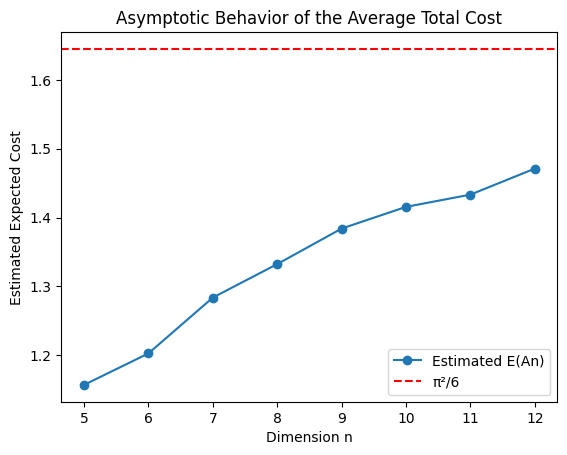

In [5]:
import numpy as np
import random

# Generate a cost matrix of random numbers uniformly distributed between 0 and 1
def cost_matrix_generator(n):
    cost_matrix = np.random.uniform(low=0, high=1, size=(n, n))
    return cost_matrix

def calculate_total_cost(C, sigma):
    total_cost = sum(C[i, sigma[i]] for i in range(len(sigma)))
    return total_cost

def random_permutation(n):
    permutation = list(range(n))
    random.shuffle(permutation)
    return permutation

def metropolis_hastings(C, beta, steps, burn_in=10000):
    n = len(C)
    sigma = random_permutation(n)                                              
    
    for _ in range(steps + burn_in):
        proposed_sigma = sigma[:]
        i, j = random.sample(range(n), 2)
        proposed_sigma[i], proposed_sigma[j] = proposed_sigma[j], proposed_sigma[i]

        reference_cost = calculate_total_cost(C, sigma)
        proposed_cost = calculate_total_cost(C, proposed_sigma)

        # Calculate acceptance probability
        acceptance_prob = min(1, np.exp(-beta * (proposed_cost - reference_cost)))

        # Decide whether to accept the proposed state
        if random.uniform(0, 1) < acceptance_prob:
            sigma = proposed_sigma

    return sigma

# SIMULATIONS

# Parameters for the Metropolis-Hastings algorithm
beta = 20 
steps = 100000 
burn_in = 10000 # Adding a burn-in period to stabilize the Markov chain, equal to 10% of N.

# Parameters for the simulation
dimensions = [number for number in range(5, 13)]
M = 1000 # Number of simulations

expected_values_list = []

for n in dimensions:
    print(f"Processing dimension: {n}")
    costs_list = []
    for _ in range(M):
        C = cost_matrix_generator(n)
        sigma = metropolis_hastings(C, beta, steps, burn_in)
        cost = calculate_total_cost(C, sigma)
        costs_list.append(cost)
    E_An = sum(costs_list) / M
    expected_values_list.append(E_An)

print(expected_values_list)

# Plotting the results
import matplotlib.pyplot as plt

plt.plot(dimensions, expected_values_list, marker='o', label='Estimated E(An)')
plt.axhline(y=np.pi**2 / 6, color='r', linestyle='--', label='π²/6')
plt.xlabel('Dimension n')
plt.ylabel('Estimated Expected Cost')
plt.title('Asymptotic Behavior of the Average Total Cost')
plt.legend()
plt.show()

**Parameters used**: $\beta = 20; N = 100000; M = 1000; n = \{5, 6, ..., 12\}$

### $\beta = 20; N = 100000; M = 1000; n = \{5, 10, 15, 20\}$

Processing dimension: 5
Processing dimension: 10
Processing dimension: 15
Processing dimension: 20
[1.147938765148078, 1.4020712046483275, 1.5727237878065827, 1.7265174549009705]


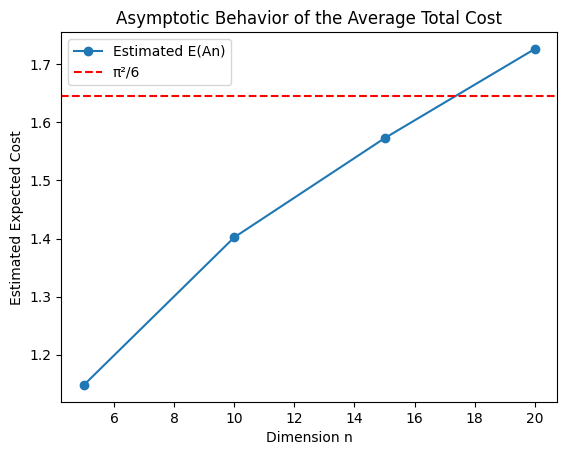

In [6]:
import numpy as np
import random

# Generate a cost matrix of random numbers uniformly distributed between 0 and 1
def cost_matrix_generator(n):
    cost_matrix = np.random.uniform(low=0, high=1, size=(n, n))
    return cost_matrix

def calculate_total_cost(C, sigma):
    total_cost = sum(C[i, sigma[i]] for i in range(len(sigma)))
    return total_cost

def random_permutation(n):
    permutation = list(range(n))
    random.shuffle(permutation)
    return permutation

def metropolis_hastings(C, beta, steps, burn_in=10000):
    n = len(C)
    sigma = random_permutation(n)                                              
    
    for _ in range(steps + burn_in):
        proposed_sigma = sigma[:]
        i, j = random.sample(range(n), 2)
        proposed_sigma[i], proposed_sigma[j] = proposed_sigma[j], proposed_sigma[i]

        reference_cost = calculate_total_cost(C, sigma)
        proposed_cost = calculate_total_cost(C, proposed_sigma)

        # Calculate acceptance probability
        acceptance_prob = min(1, np.exp(-beta * (proposed_cost - reference_cost)))

        # Decide whether to accept the proposed state
        if random.uniform(0, 1) < acceptance_prob:
            sigma = proposed_sigma

    return sigma

# SIMULATIONS

# Parameters for the Metropolis-Hastings algorithm
beta = 20 
steps = 100000 
burn_in = 10000 # Adding a burn-in period to stabilize the Markov chain, equal to 10% of N.

# Parameters for the simulation
dimensions = [number for number in range(5, 21, 5)]
M = 1000 # Number of simulations

expected_values_list = []

for n in dimensions:
    print(f"Processing dimension: {n}")
    costs_list = []
    for _ in range(M):
        C = cost_matrix_generator(n)
        sigma = metropolis_hastings(C, beta, steps, burn_in)
        cost = calculate_total_cost(C, sigma)
        costs_list.append(cost)
    E_An = sum(costs_list) / M
    expected_values_list.append(E_An)

print(expected_values_list)

# Plotting the results
import matplotlib.pyplot as plt

plt.plot(dimensions, expected_values_list, marker='o', label='Estimated E(An)')
plt.axhline(y=np.pi**2 / 6, color='r', linestyle='--', label='π²/6')
plt.xlabel('Dimension n')
plt.ylabel('Estimated Expected Cost')
plt.title('Asymptotic Behavior of the Average Total Cost')
plt.legend()
plt.show()

**Parameters used**: $\beta = 20; N = 100000; M = 1000; n = \{5, 10, 15, 20\}$

**Graph considerations**:

With $n = 20$, it is evident that the asymptotic limit is not respected anymore. 

A reason could be that the Markov chain did not have an adequate amount of steps in order to explore its state space, thus it did not manage to find better minimal solutions during the simulations, resulting in a higher expected value.

### **Final graph**

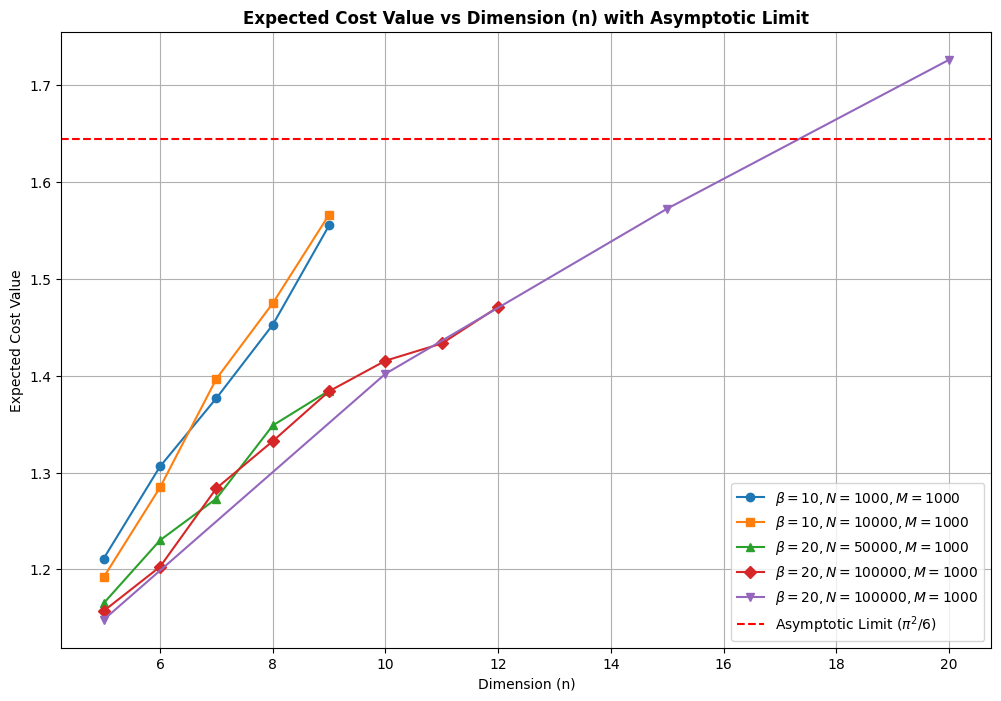

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data
n_1 = np.array([5, 6, 7, 8, 9])
values_1 = np.array([1.2111411706537052, 1.3062680528655557, 1.3768586524749433, 1.4526830496187049, 1.5554053420616614])

n_2 = np.array([5, 6, 7, 8, 9])
values_2 = np.array([1.1918234176701925, 1.2846198312924104, 1.396877003590466, 1.4749283962768167, 1.5665011278009624])

n_3 = np.array([5, 6, 7, 8, 9])
values_3 = np.array([1.1649716250864872, 1.2300508004416537, 1.2730938622936416, 1.348623736371532, 1.3846478462794842])

n_4 = np.array([5, 6, 7, 8, 9, 10, 11, 12])
values_4 = np.array([1.1569775092461922, 1.2026638921116137, 1.2837706862716858, 1.3324327011427513, 1.384017322814036, 1.415567182187853, 1.4333506001157499, 1.4711737444732087])

n_5 = np.array([5, 10, 15, 20])
values_5 = np.array([1.147938765148078, 1.4020712046483275, 1.5727237878065827, 1.7265174549009705])

# Asymptotic limit
asymptotic_limit = np.pi**2 / 6

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(n_1, values_1, marker='o', label=r'$\beta=10, N=1000, M=1000$')
plt.plot(n_2, values_2, marker='s', label=r'$\beta=10, N=10000, M=1000$')
plt.plot(n_3, values_3, marker='^', label=r'$\beta=20, N=50000, M=1000$')
plt.plot(n_4, values_4, marker='D', label=r'$\beta=20, N=100000, M=1000$')
plt.plot(n_5, values_5, marker='v', label=r'$\beta=20, N=100000, M=1000$')

# Asymptotic limit line
plt.axhline(y=asymptotic_limit, color='r', linestyle='--', label=r'Asymptotic Limit ($\pi^2 / 6$)')

plt.xlabel('Dimension (n)')
plt.ylabel('Expected Cost Value')
plt.title('Expected Cost Value vs Dimension (n) with Asymptotic Limit', fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()